# LeDebruiteur
* Jonas Freiburghaus
* Romain Capocasale
* He-Arc, INF3dlm-a
* Image Processing course
* 2019-2020

## Noise Reduction Neural Network

In [1]:
%matplotlib inline

import os

from debruiteur.generator.datagenerator import DataGenerator
from debruiteur.plots.plots import plot_result_comparison_neural_network
from debruiteur.preprocessing.preprocessor import make_original_dataframe, make_resized_dataframe, make_noised_dataframe
from debruiteur.noise.filters import median_filter, gaussian_weighted_substract_filter
from debruiteur.noise.noise import GaussianNoise, PoissonNoise, UniformNoise, SaltPepperNoise, SquareMaskNoise, SpeckleNoise
from debruiteur.utils.utils import load_model, split_train_val_df

In [2]:
noise_class_list = [
    GaussianNoise(mean=0, std=20),
    PoissonNoise(),
    UniformNoise(amplitude=100),
    SaltPepperNoise(),
    SquareMaskNoise(mask_shape=(10, 10), freq=0.1),
    SpeckleNoise()
]

In [3]:
working_dir = os.path.abspath(os.getcwd())

df_original = make_original_dataframe(os.path.join(working_dir, "images"))
df_resized = make_resized_dataframe(df_original, img_shape=(100, 100), resized_path=os.path.join(working_dir, "resized_images"))
df_noised = make_noised_dataframe(df_resized, noise_class_list, os.path.join(working_dir, "noised_images"))

In [4]:
df_train, df_val = split_train_val_df(df_noised)

### Convolutional autoencoder

The noise is well removed however the images are blured probably because of the convolution layers

In [5]:
conv_ae_model = load_model(os.path.join(working_dir, "saved_models"), "conv_autoencoder.h5")

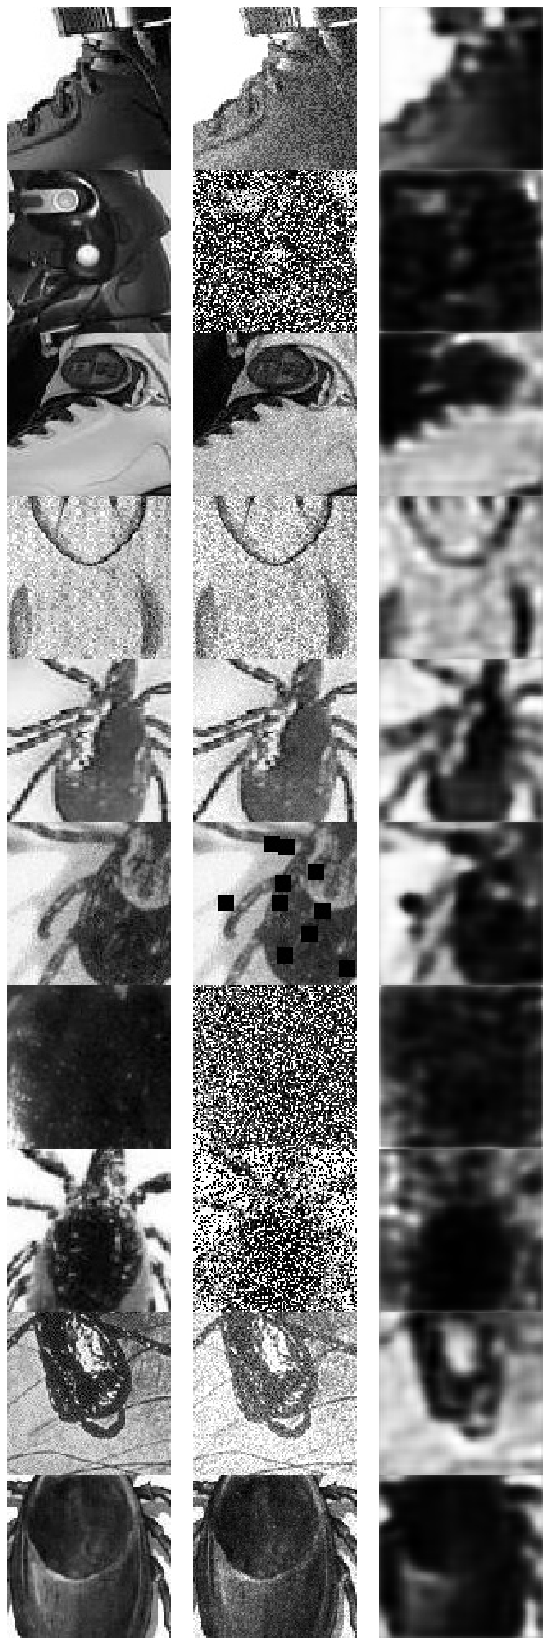

In [6]:
val_gen = DataGenerator(df_val)
plot_result_comparison_neural_network(conv_ae_model, val_gen)

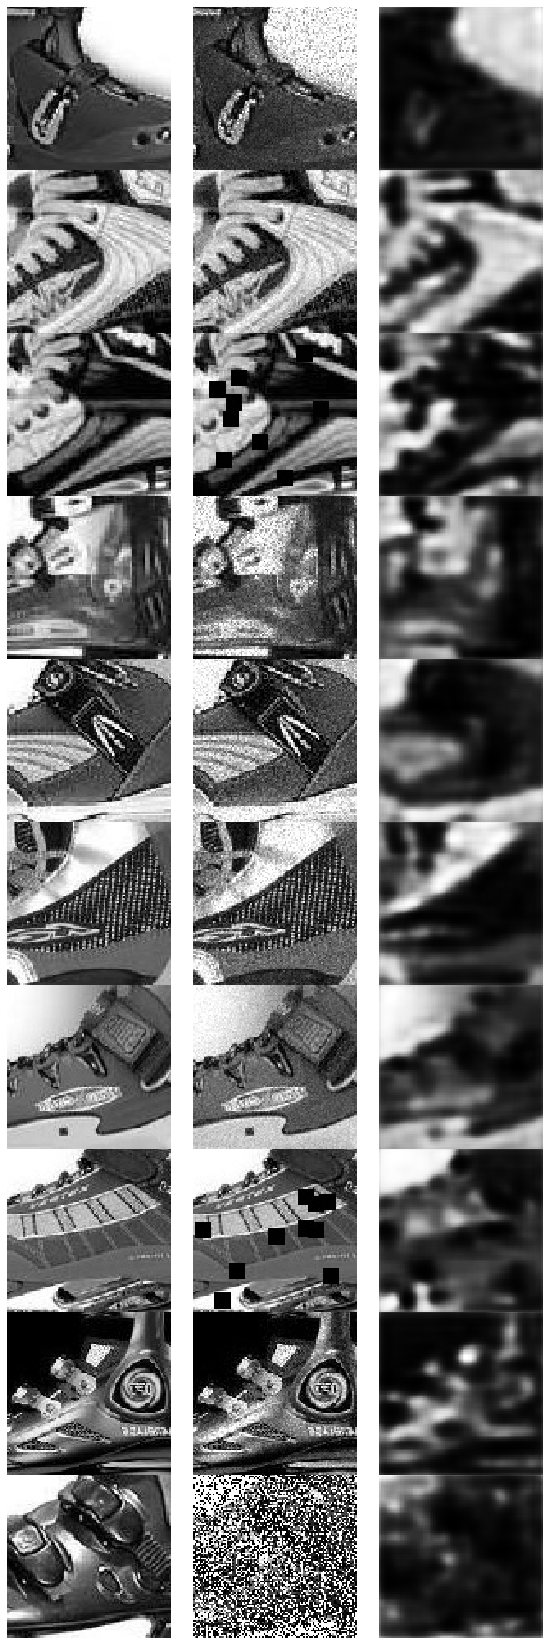

In [7]:
train_gen = DataGenerator(df_train)
plot_result_comparison_neural_network(conv_ae_model, train_gen)

### Dense autoencoder

This one doesn't work quite well

In [8]:
dense_ae_model = load_model(os.path.join(working_dir, "saved_models"), "dense_autoencoder.h5")

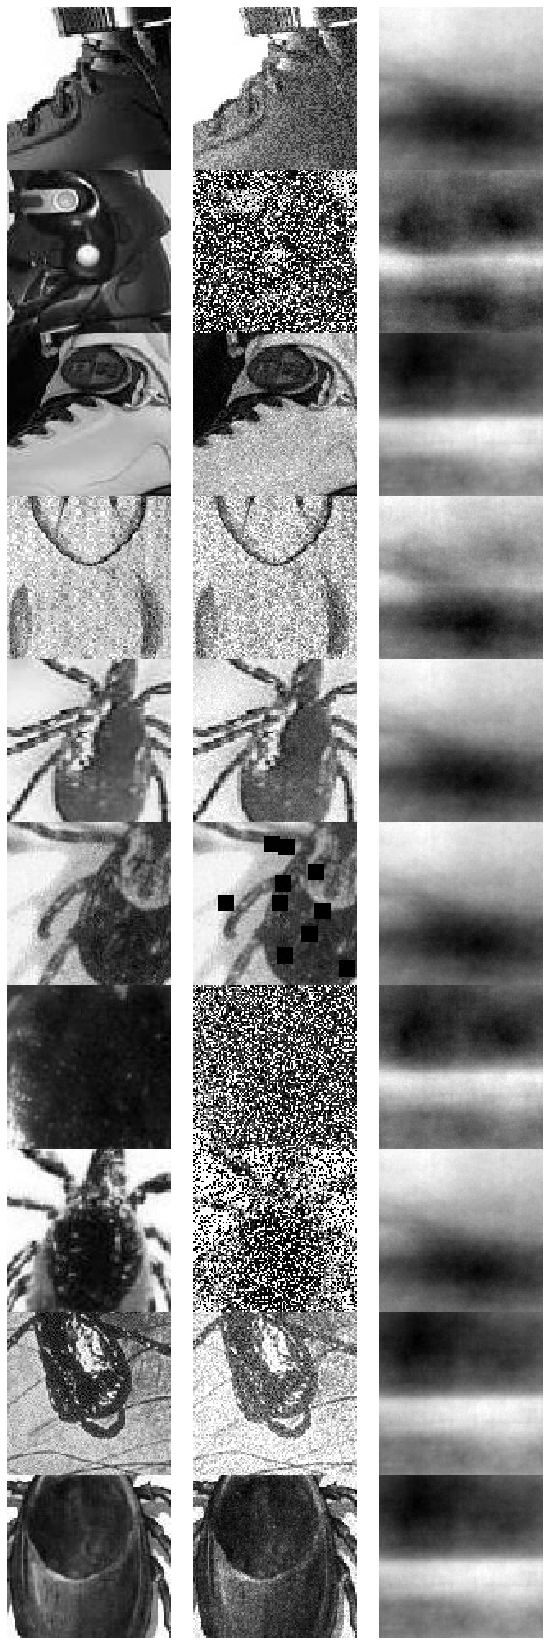

In [9]:
val_gen = DataGenerator(df_val, img_shape=(10000, ))
plot_result_comparison_neural_network(dense_ae_model, val_gen, reshape=(100, 100))

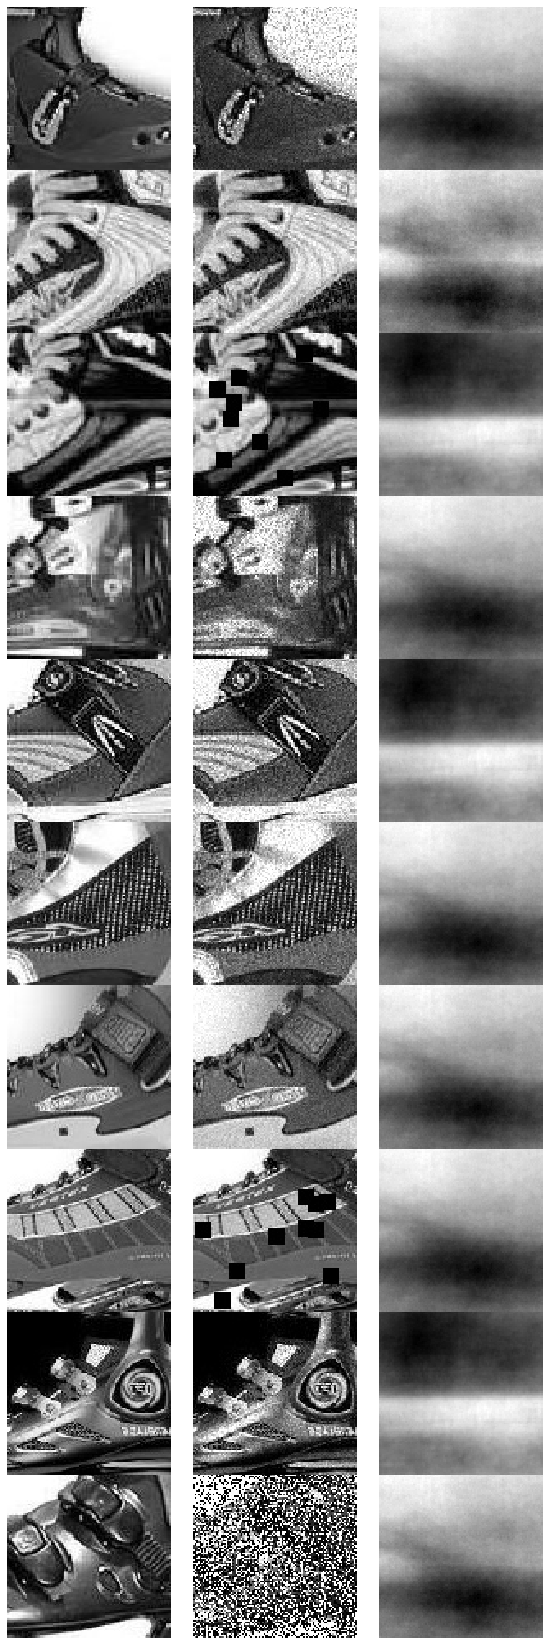

In [10]:
train_gen = DataGenerator(df_train, img_shape=(10000, ))
plot_result_comparison_neural_network(dense_ae_model, train_gen, reshape=(100, 100))

### GAN
The model has only been trained on gaussian and uniform noise.  
An improvement would be to add a style loss on the model's training. As we can see it sometimes loses some texture details.

In [11]:
gan_model = load_model(os.path.join(working_dir, "saved_models"), "gan_generator.h5")

C:\Users\jonas.freiburg\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\keras\layers\core.py:986: UserWarning: debruiteur.models.gan is not loaded, but a Lambda layer uses it. It may cause errors.
  , UserWarning)


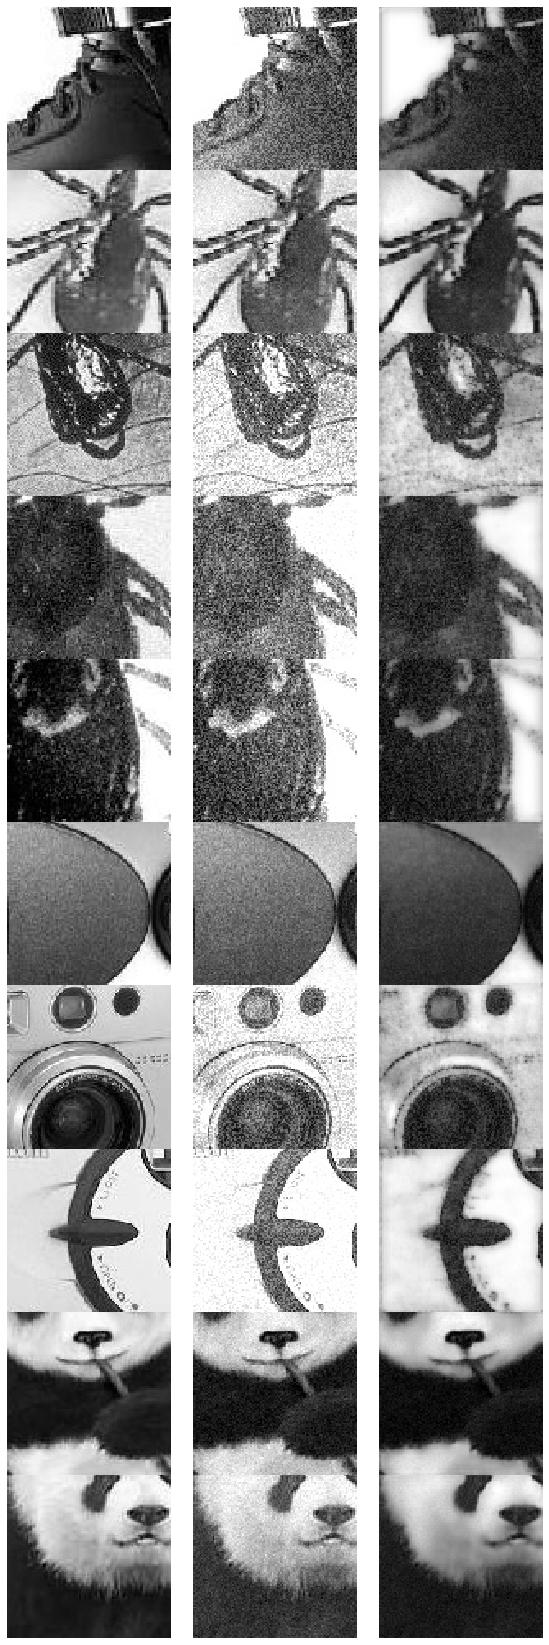

In [12]:
df_val_gaus_uni = df_val[df_val["noised_path"].str.contains("GaussianNoise|UniformNoise")]
val_gen = DataGenerator(df_val_gaus_uni)
plot_result_comparison_neural_network(gan_model, val_gen)

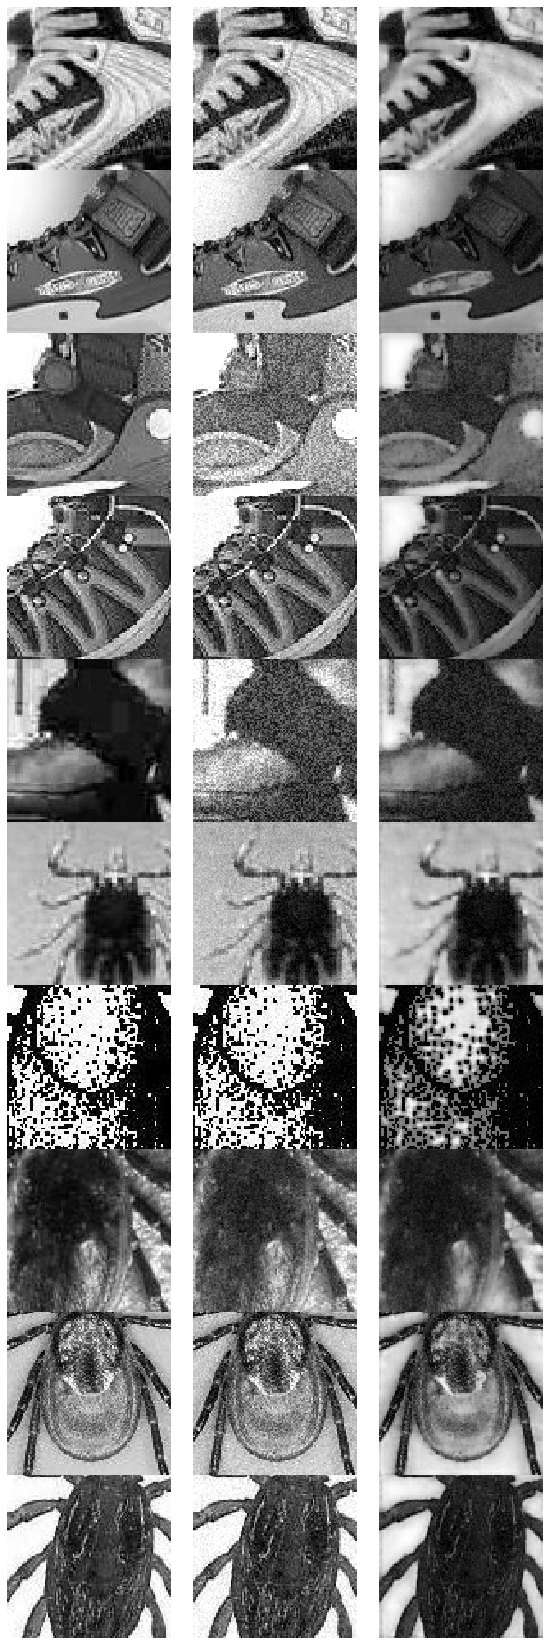

In [13]:
df_train_gaus_uni = df_train[df_train["noised_path"].str.contains("GaussianNoise|UniformNoise")]
train_gen = DataGenerator(df_train_gaus_uni)
plot_result_comparison_neural_network(gan_model, train_gen)

# Combining the GAN images with some filters

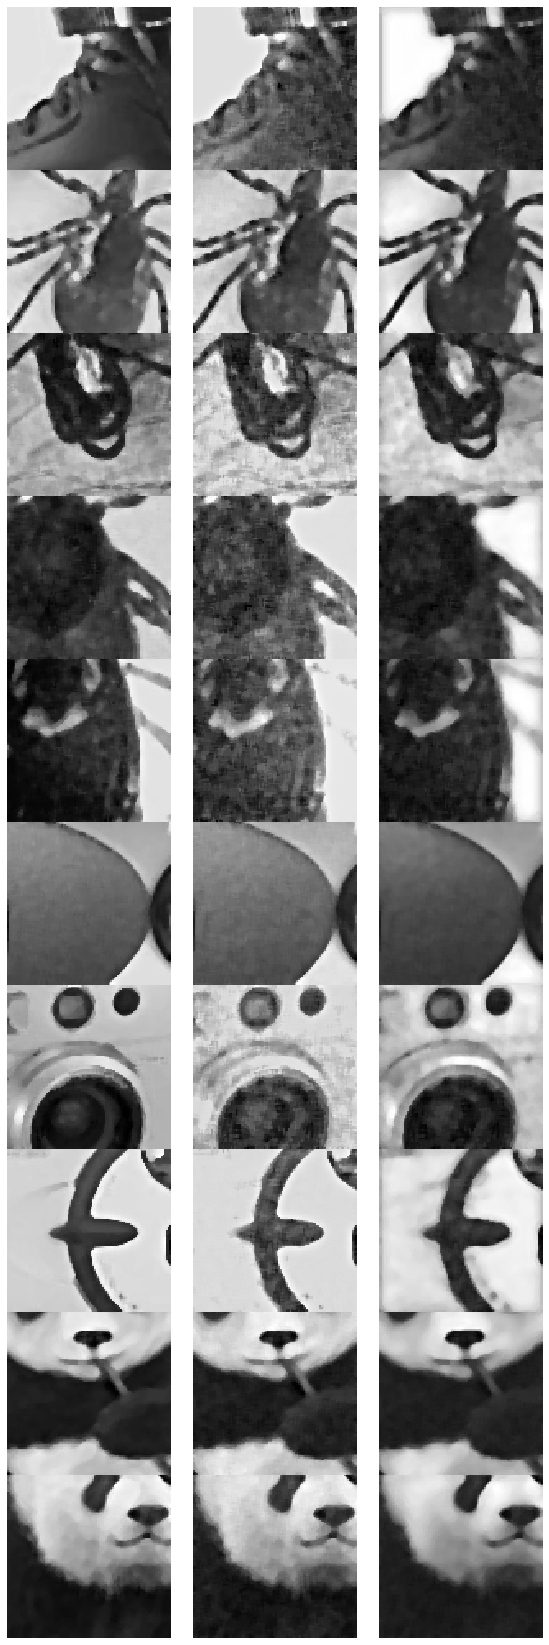

In [14]:
filter_pipeline = [median_filter, gaussian_weighted_substract_filter]
plot_result_comparison_neural_network(gan_model, val_gen, filter_pipeline=filter_pipeline)